# Simple Neural Network with TensorFlow
One hidden layer with 5 units and dropout

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

## Load Datasets


In [53]:
train = pd.read_csv('11-10_train_dataset_W1.csv')
val = pd.read_csv('11-10_val_dataset_W1.csv')

train.set_index('pid', inplace=True)
val.set_index('pid', inplace=True)

X_train_binary = train.drop(['BDI2', 'dep'], axis=1).values
y_train_binary = train['dep'].values
X_val_binary = val.drop(['BDI2', 'dep'], axis=1).values
y_val_binary = val['dep'].values

#the regression data has NaN values that need to be dropped

train_reg = train.dropna(inplace=False)
val_reg = val.dropna(inplace=False)

X_train_reg = train_reg.drop(['BDI2', 'dep'], axis=1).values
y_train_regression = train_reg['BDI2'].values
X_val_reg = val_reg.drop(['BDI2', 'dep'], axis=1).values
y_val_regression = val_reg['BDI2'].values

input_dim_binary = X_train_binary.shape[1]
input_dim_regression = X_train_reg.shape[1] 

#standard scaler
scaler_binary = StandardScaler()
# X_train_binary = scaler_binary.fit_transform(X_train_binary)
# X_val_binary = scaler_binary.transform(X_val_binary)

scaler_regression = StandardScaler()
X_train_reg = scaler_regression.fit_transform(X_train_reg)
X_val_reg = scaler_regression.transform(X_val_reg)

## Define Model Architecture
One hidden layer with 5 units and dropout

In [16]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [26]:

input_dim = input_dim_binary  # Replace with your actual number of features

model_binary = keras.Sequential([

    layers.Input(shape=(input_dim,)),
    
    # Hidden layer with 5 units
    layers.Dense(5, activation='relu', name='hidden_layer'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout'),
    
    # Output layer
    layers.Dense(1, activation='sigmoid', name='output_layer')  # Adjust as needed
])

# Display model architecture
model_binary.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 5)              │        25,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,936 (101.31 KB)

 Trainable params: 25,936 (101.31 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:


input_dim = input_dim_regression  # Replace with your actual number of features

# Create the model
model_BDI = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_dim,)),
    
    # Hidden layer with 5 units
    layers.Dense(5, activation='relu', name='hidden_layer'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout'),
    

    # For regression: 1 unit with no activation
    layers.Dense(1, activation=None, name='output_layer')  # Adjust as needed
])

# Display model architecture
model_BDI.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 5)              │        25,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,936 (101.31 KB)

 Trainable params: 25,936 (101.31 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [69]:
# Compile the model
# Adjust loss and metrics based on your task:
# - Binary classification: 'binary_crossentropy'
# - Multi-class: 'categorical_crossentropy' or 'sparse_categorical_crossentropy'
# - Regression: 'mse' or 'mae'
model_binary.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Adjust based on your task
    metrics=['accuracy']  # Adjust based on your task
)

model_BDI.compile(
    optimizer='adam',
    loss='mse',  # Adjust based on your task
    metrics=['mae']  # Adjust based on your task
)

## Train Model

In [44]:
# Train the model
history_binary = model_binary.fit(
    X_train_binary,
    y_train_binary,
    epochs=50,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val_binary, y_val_binary),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6263 - loss: 0.6685 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6263 - loss: 0.6684 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6684 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6683 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6263 - loss: 0.6682 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6811 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6263 - loss: 0.6681 - val_accuracy: 0.6744 - val_loss: 5971487.0000
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6263 - loss: 0.6745 

In [70]:
history_bdi = model_BDI.fit(
    X_train_reg,
    y_train_regression,
    epochs=50,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val_reg, y_val_regression),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 212.0965 - mae: 10.2307 - val_loss: 266.0979 - val_mae: 13.0916
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 230.1758 - mae: 10.6971 - val_loss: 265.0590 - val_mae: 13.0876
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 223.3311 - mae: 10.8259 - val_loss: 262.2100 - val_mae: 12.9678
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 230.6002 - mae: 11.1718 - val_loss: 266.0863 - val_mae: 12.9979
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 211.9263 - mae: 9.9876 - val_loss: 271.4819 - val_mae: 13.1029
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 217.9247 - mae: 10.4876 - val_loss: 275.8414 - val_mae: 13.1880
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 215.2556 - mae: 10.2017 - val_loss: 278.0704 - val_mae: 13.1882
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 213.4739 - mae: 10.8026 - val_loss: 285.0587 - val_mae: 13.2925
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━

## Evaluate Model

In [57]:
# Evaluate on validation set
val_loss, val_accuracy = model_BDI.evaluate(X_val_reg, y_val_regression)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 248.5173 - mse: 248.5173
Validation Loss: 248.5173
Validation Accuracy: 248.5173


In [59]:
# Evaluate on validation set
val_loss, val_accuracy = model_binary.evaluate(X_val_binary, y_val_binary)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6744 - loss: 5971487.0000 
Validation Loss: 5971487.0000
Validation Accuracy: 0.6744


## Plot Training History

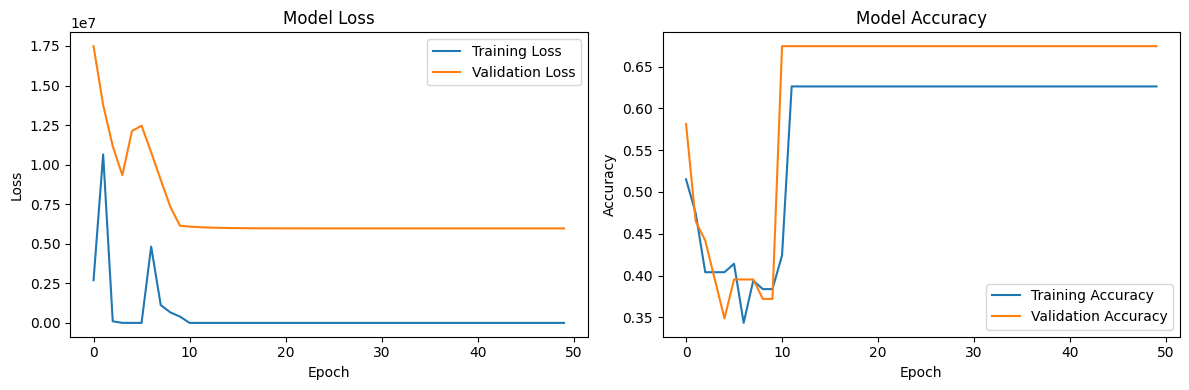

In [36]:

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

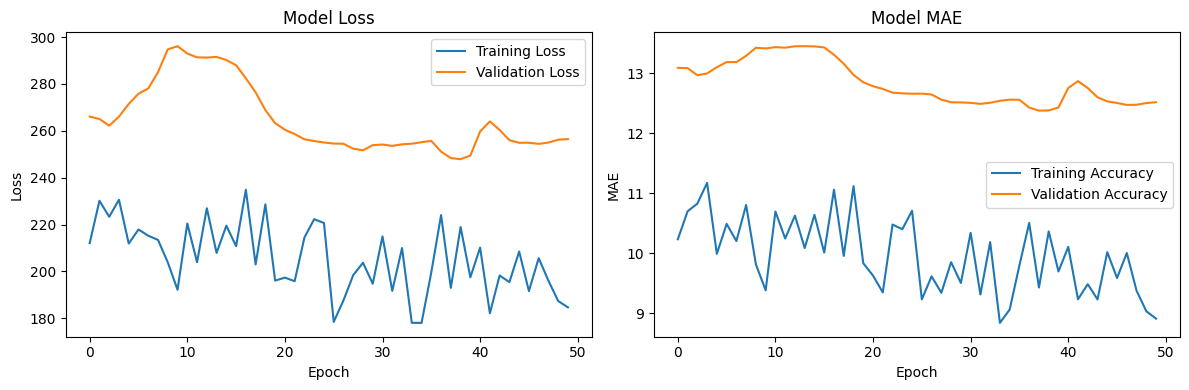

In [74]:

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_bdi.history['loss'], label='Training Loss')
plt.plot(history_bdi.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bdi.history['mae'], label='Training Accuracy')
plt.plot(history_bdi.history['val_mae'], label='Validation Accuracy')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Make Predictions

In [65]:
# Make predictions on validation set
predictions = model_BDI.predict(X_val_reg)
print(f"Predictions shape: {predictions.shape}")
print(f"First 5 predictions: {predictions[:5].flatten()}")

predictions_binary = model_binary.predict(X_val_binary)
print(f"Predictions shape: {predictions_binary.shape}")
print(f"First 5 predictions: {predictions_binary[:5].flatten()}")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x311e71620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Predictions shape: (42, 1)
First 5 predictions: [2.4158351 2.685603  5.896173  5.590448  4.0112023]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predictions shape: (43, 1)
First 5 predictions: [0.46552923 0.4655

In [67]:
print('validation length binary:', len(X_val_binary))
print('validation length regression:', len(X_val_reg))
print('train length binary:', len(X_train_binary))
print('train length regression:', len(X_train_reg))

validation length binary: 43
validation length regression: 42
train length binary: 99
train length regression: 97


In [63]:
input_dim_regression

5185

In [66]:
#dataframe with the predictions and true values for BDI regression
bdi_results = pd.DataFrame({
    'True_BDI': y_val_regression,
    'Predicted_BDI': predictions.flatten()
})

#display the results
bdi_results.to_csv('bdi_regression_predictions_small_nn_milestone.csv', index=False)

In [50]:
#binary results dataframe
binary_results = pd.DataFrame({
    'True_Depression': y_val_binary,
    'Predicted_Probability': predictions_binary.flatten()
})
binary_results.to_csv('binary_classification_predictions_small_nn_milestone.csv', index=False)

In [49]:
#total predicted as true
total_predicted_true = (predictions_binary.flatten() >= 0.5).sum()
print(f"Total predicted as true: {total_predicted_true}")

Total predicted as true: 2
